# **ANÁLISE EXPLORATÓRIA**
*   ### **Case**: *Livraria*



### Instalação de bibliotecas

In [1]:
# As bibliotecas utilizadas neste notebook já vêm pré-instaladas no Google Colab

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura da base de dados

In [3]:
dados_estoque = pd.read_table('../Dados/Livraria_Estoque.txt', sep = '\t')

### Visualização da base de dados

In [4]:
display(dados_estoque)

,id_titulo,categoria,qtde_paginas,edicao,tipo_capa,densidade_papel,cor,ano,preco
0,1,Autoajuda,462,Reedicao,Flexivel,Baixa,Preto,Até 2017,72.49
1,2,Artes,559,Reedicao,Dura,Alta,Preto,Até 2017,68.58
2,3,Artes,475,Reedicao,Dura,Alta,Cores,2018-2020,69.57
3,4,Autoajuda,65,Original,Flexivel,Baixa,Preto,2021-2023,32.66
4,5,Infantil,560,Reedicao,Flexivel,Baixa,Cores,2018-2020,64.10
...,...,...,...,...,...,...,...,...,...
16995,16996,Autoajuda,194,Reedicao,Flexivel,Baixa,Preto,2021-2023,30.33
16996,16997,Culinaria,573,Original,Flexivel,Baixa,Cores,2018-2020,60.26
16997,16998,Culinaria,608,Original,Flexivel,Alta,Cores,2021-2023,77.59
16998,16999,Ciencias,485,Reedicao,Flexivel,Baixa,Preto,Até 2017,71.57


### Análise de unicidade

*Verificação de quais registros estão duplicados em uma variável*

In [5]:
dados_estoque.duplicated(subset = 'id_titulo')

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Length: 17000, dtype: bool

*Contabilização da quantidade de duplicados*

In [6]:
dados_estoque.duplicated(subset = 'id_titulo').sum()

0

### Análise univariada: variáveis qualitativas *(exemplos)*

*Tabela de frequências absolutas, incluindo missings*

In [7]:
dados_estoque['tipo_capa'].value_counts(dropna = False)

Flexivel    12267
Dura         4733
Name: tipo_capa, dtype: int64

*Tabela de frequências relativas, incluindo missings*

In [8]:
dados_estoque['tipo_capa'].value_counts(normalize = True, dropna = False)

Flexivel    0.721588
Dura        0.278412
Name: tipo_capa, dtype: float64

*Arredondando as frequências na tabela anterior*

In [9]:
(dados_estoque['tipo_capa'].value_counts(normalize = True, dropna = False) * 100).round(1)

Flexivel    72.2
Dura        27.8
Name: tipo_capa, dtype: float64

*Ordenando categorias em uma variável qualitativa ordinal*

In [10]:
dados_estoque['ano'] = pd.Categorical(
    dados_estoque['ano'],
    categories = ['2021-2023', '2018-2020', 'Até 2017'],
    ordered    = True)

*Gráfico de barras (básico)*

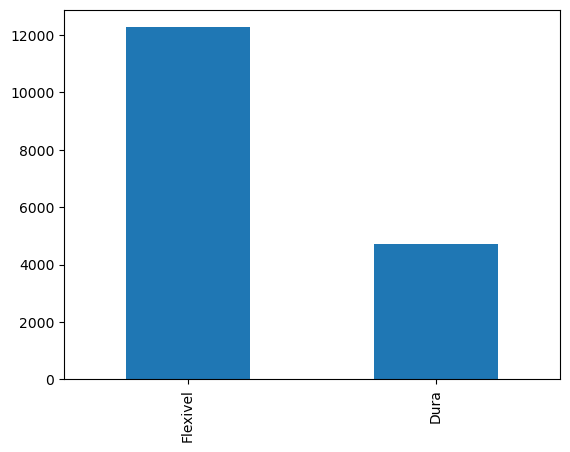

In [11]:
dados_estoque['tipo_capa'].value_counts(dropna = False).plot(kind = 'bar')

plt.show() # Exibir o gráfico

*Gráfico de barras (formatado)*

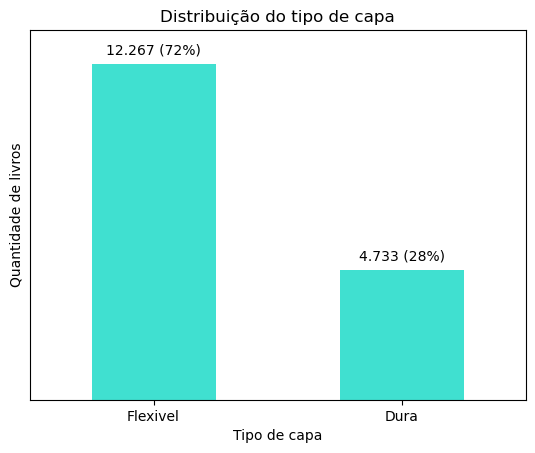

In [12]:
ax = dados_estoque['tipo_capa'].value_counts(dropna = False).plot(kind = 'bar', color = 'turquoise')

ax.set_title('Distribuição do tipo de capa')              # Título do gráfico
ax.set_xlabel('Tipo de capa')                             # Título do eixo horizontal
ax.set_ylabel('Quantidade de livros')                     # Título do eixo vertical

ax.set_yticks([])                                         # Remover ticks do eixo vertical
ax.set_yticklabels([])                                    # Remover rótulos do eixo vertical
ax.tick_params(axis = 'x', rotation = 0)                  # Rotação dos rótulos do eixo horizontal
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)                   # Ajustar limite do eixo vertical para caberem os rótulos das barras

total = sum([bar.get_height() for bar in ax.patches])     # Inserir rótulos sobre as barras
for bar in ax.patches:
    height     = bar.get_height()
    percentage = f'{(height / total) * 100:.0f}%'
    ax.annotate(f'{int(height):,}'.replace(',', '.') + f' ({percentage})',
                xy         = (bar.get_x() + bar.get_width() / 2, height),
                xytext     = (0, 5),
                textcoords = 'offset points',
                ha         = 'center',
                va         = 'bottom')

plt.show()

# for bar in ax.containers:                               # Inserir rótulos sobre as barras (opção mais simples)
#    ax.bar_label(bar)

*Gráfico de setores (básico)*

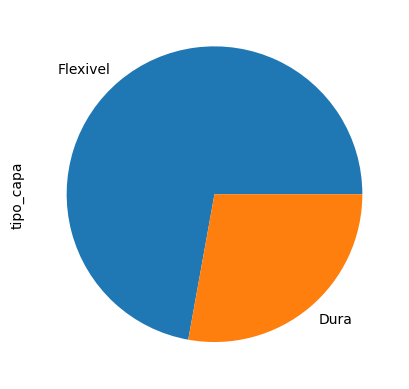

In [13]:
dados_estoque['tipo_capa'].value_counts(dropna = False).plot(kind = 'pie')

plt.show()

*Gráfico de setores (formatado)*

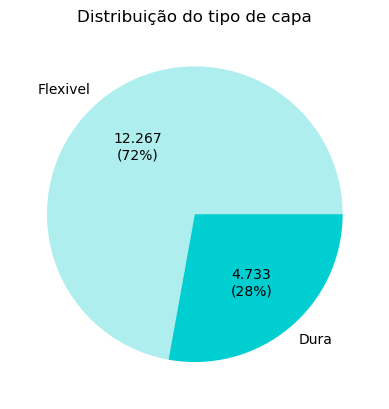

In [14]:
autopct = lambda p: '{:,.0f}\n({:.0f}%)'.format((p/100) * sum(dados_estoque['tipo_capa'].value_counts(dropna = False)), p).replace(',', '.')   # Formatação dos rótulos das fatias

ax = dados_estoque['tipo_capa'].value_counts(dropna = False).plot(kind = 'pie', colors = ['paleturquoise', 'darkturquoise'],
                                                                  autopct = autopct)

ax.set_title('Distribuição do tipo de capa')   # Título do gráfico
ax.set_ylabel('')                              # Título do eixo vertical

plt.show()

### Análise univariada: variáveis quantitativas *(exemplos)*

*Mínimo, máximo, quartis, mediana, média*

In [15]:
dados_estoque.describe()            # Considera todas as variáveis quantitativas da base

,id_titulo,qtde_paginas,preco
count,17000.000000,17000.000000,17000.000000
mean,8500.500000,383.116765,53.905895
std,4907.621624,169.425551,22.344554
min,1.000000,50.000000,-13.800000
25%,4250.750000,262.000000,38.120000
50%,8500.500000,361.000000,51.785000
75%,12750.250000,482.000000,67.142500
max,17000.000000,2025.000000,225.770000


In [16]:
dados_estoque['preco'].describe()   # Apenas a variável 'preco'

count    17000.000000
mean        53.905895
std         22.344554
min        -13.800000
25%         38.120000
50%         51.785000
75%         67.142500
max        225.770000
Name: preco, dtype: float64

*Qtde. de missings*

In [17]:
dados_estoque.isnull().sum()

id_titulo          0
categoria          0
qtde_paginas       0
edicao             0
tipo_capa          0
densidade_papel    0
cor                0
ano                0
preco              0
dtype: int64

*Moda*

In [18]:
dados_estoque['preco'].mode()[0]  # Note que preço é uma variável quantitativa contínua; caso houvesse alguma quantitativa discreta, faria mais sentido para cálculo da moda

53.35

*Percentis*

In [19]:
dados_estoque['preco'].quantile([0.01, 0.80, 0.99])

0.01     11.2298
0.80     71.3700
0.99    116.7305
Name: preco, dtype: float64

*Variância*

In [20]:
dados_estoque['preco'].var()

499.27907446270285

*Desvio padrão*

In [21]:
dados_estoque['preco'].std()

22.344553574925207

*Coeficiente de variação*

In [22]:
dados_estoque['preco'].std() / dados_estoque['preco'].mean()

0.41451039254315375

*Amplitude*

In [23]:
dados_estoque['preco'].max() - dados_estoque['preco'].min()

239.57000000000002

*Amplitude percentílica*

In [24]:
dados_estoque['preco'].quantile(0.99) - dados_estoque['preco'].quantile(0.01)

105.50069999999992

*Intervalo interquartil*

In [25]:
dados_estoque['preco'].quantile(0.75) - dados_estoque['preco'].quantile(0.25)

29.0225

*Histograma (básico)*

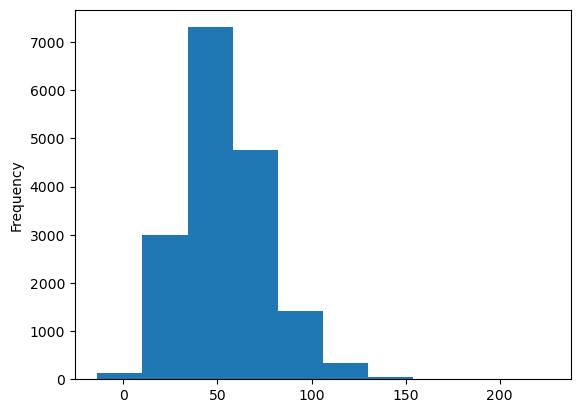

In [26]:
dados_estoque['preco'].plot(kind = 'hist')

plt.show()

*Histograma (formatado)*

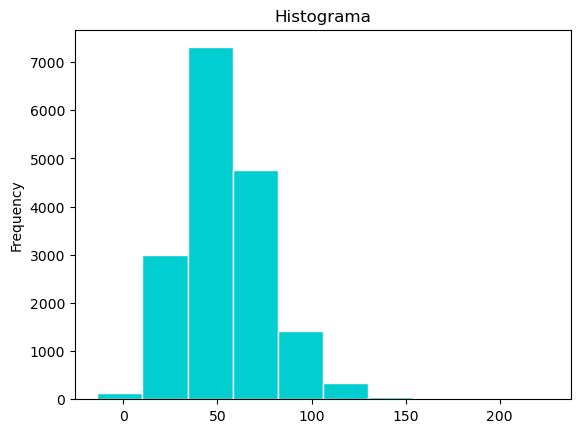

In [27]:
dados_estoque['preco'].plot(
    kind      = 'hist',
    title     = 'Histograma',
    xlabel    = 'Metragem (em m2)',
    ylabel    = 'Frequência',
    color     = 'darkturquoise',
    edgecolor = 'white')

plt.show()

*Boxplot (básico)*

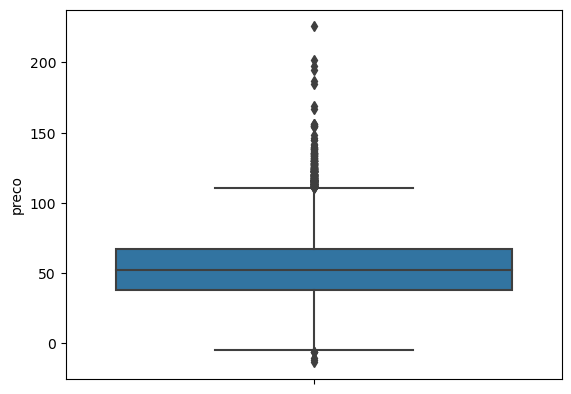

In [28]:
sns.boxplot(y = 'preco', data = dados_estoque)

plt.show()

*Boxplot (formatado)*

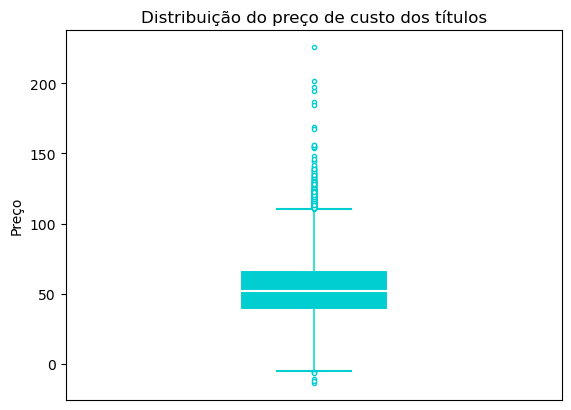

In [29]:
# Usando função 'boxplot' da biblioteca 'seaborn'

sns.boxplot(y     = 'preco',
            data  = dados_estoque,
            width = 0.3,                                                     # Largura da caixa
            boxprops     = {'facecolor':'darkturquoise', 'edgecolor':'white'},   # Cor de preenchimento e borda da caixa
            whiskerprops = {'color':'turquoise'},                            # Cor das hastes/bigodes
            capprops     = {'color': 'darkturquoise'},                       # Cor das barras de limite superior e inferior
            medianprops  = {'color':'white'},                                # Cor da linha da mediana
            flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'})    # Cor e tamanho dos outliers

plt.title('Distribuição do preço de custo dos títulos')    # Título do gráfico
plt.ylabel('Preço')                                        # Título do eixo vertical
plt.xticks([])                                             # Remover ticks do eixo horizontal

plt.show()

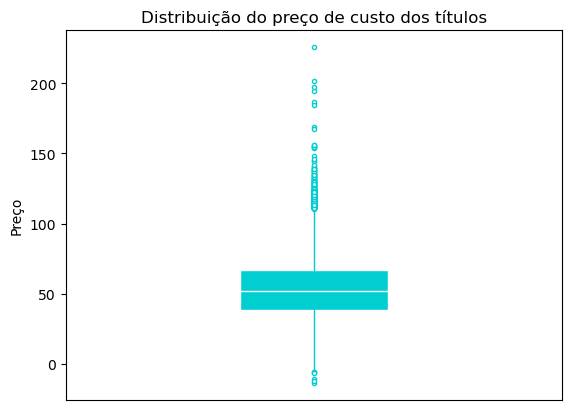

In [30]:
# Usando método 'plot' da biblioteca 'pandas'

ax = dados_estoque['preco'].plot(
    kind  = 'box',
    title = 'Boxplot',
    patch_artist = True,
    widths       = 0.3,                                                # Largura da caixa
    boxprops     = {'facecolor': 'darkturquoise', 'color': 'white'},   # Cor de preenchimento e borda da caixa
    whiskerprops = {'color': 'darkturquoise'},                         # Cor das hastes/bigodes
    capprops     = {'color': 'white'},                                 # Cor das barras de limite superior e inferior
    medianprops  = {'color': 'white'},                                 # Cor da linha da mediana
    flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'})    # Cor e tamanho dos outliers

ax.set_title('Distribuição do preço de custo dos títulos')    # Título do gráfico
ax.set_ylabel('Preço')                                        # Título do eixo vertical
ax.set_xticks([])                                             # Remover ticks do eixo horizontal

plt.show()

### Análise bivariada/trivariada: qualitativas vs. qualitativas *(exemplos)*

*Tabela de frequências absolutas de dupla entrada*

In [31]:
pd.crosstab(dados_estoque['tipo_capa'], dados_estoque['densidade_papel'], dropna = False)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,2090,2643
Flexivel,2638,9629


*Tabela de frequências relativas de dupla entrada, somando 100% em cada linha*

In [32]:
(pd.crosstab(dados_estoque['tipo_capa'], dados_estoque['densidade_papel'], dropna = False, normalize = 'index') * 100).round(1)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,44.2,55.8
Flexivel,21.5,78.5


*Tabela de frequências relativas de dupla entrada, somando 100% em cada coluna*

In [33]:
(pd.crosstab(dados_estoque['tipo_capa'], dados_estoque['densidade_papel'], dropna = False, normalize = 'columns') * 100).round(1)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,44.2,21.5
Flexivel,55.8,78.5


*Gráfico de barras empilhadas (básico)*

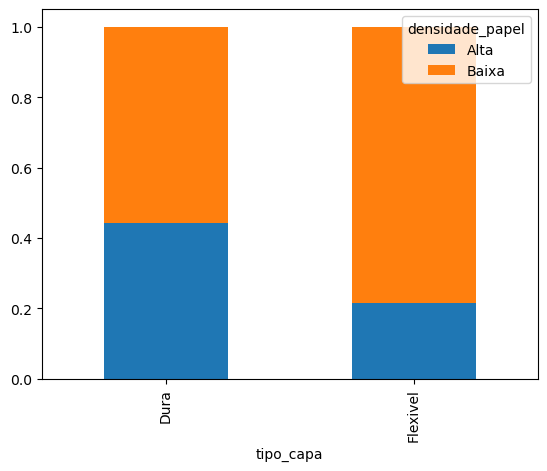

In [34]:
pd.crosstab(
    dados_estoque['tipo_capa'],
    dados_estoque['densidade_papel'],
    dropna = False,
    normalize = 'index'
).plot(kind = 'bar', stacked = True)

plt.show()

*Gráfico de barras empilhadas (formatado)*

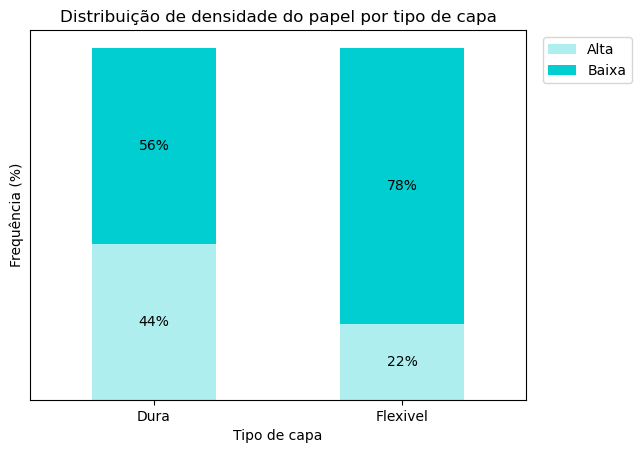

In [35]:
ax = pd.crosstab(
    dados_estoque['tipo_capa'],
    dados_estoque['densidade_papel'],
    dropna    = False,
    normalize = 'index'
).plot(
    kind = 'bar',
    stacked = True,
    color   = ['paleturquoise', 'darkturquoise'],
    title   = 'Distribuição de densidade do papel por tipo de capa',
    xlabel  = 'Tipo de capa',
    ylabel  = 'Frequência (%)'
)

ax.set_yticks([])                                             # Remover ticks do eixo vertical
ax.set_yticklabels([])                                        # Remover rótulos do eixo vertical
ax.tick_params(axis = 'x', rotation = 0)                      # Rotação dos rótulos do eixo horizontal

for bar in ax.containers:
    labels = [f'{v.get_height() * 100:.0f}%' for v in bar]    # Inserir rótulos dentro das barras
    ax.bar_label(bar, labels=labels, label_type = 'center')

ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')     # Posicionar legenda fora da área de plotagem

plt.show()

*Tabela de frequências absolutas de tripla entrada*

In [36]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'densidade_papel'],
    dropna = False
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,1325,2032
Flexivel,1977,8185


In [37]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'densidade_papel'],
    dropna = False
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,765,611
Flexivel,661,1444


*Tabela de frequências relativas de tripla entrada, somando 100% em cada linha*

In [38]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'densidade_papel'],
    dropna = False,
    normalize = 'index'
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,0.394698,0.605302
Flexivel,0.194548,0.805452


In [39]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'densidade_papel'],
    dropna = False,
    normalize = 'index'
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,0.555959,0.444041
Flexivel,0.314014,0.685986


*Tabela de frequências relativas de tripla entrada, somando 100% em cada coluna*

In [40]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Preto', 'densidade_papel'],
    dropna = False,
    normalize = 'columns'
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,0.401272,0.198884
Flexivel,0.598728,0.801116


In [41]:
pd.crosstab(
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'tipo_capa'],
    dados_estoque.loc[dados_estoque['cor'] == 'Cores', 'densidade_papel'],
    dropna = False,
    normalize = 'columns'
)

densidade_papel,Alta,Baixa
tipo_capa,,
Dura,0.536466,0.297324
Flexivel,0.463534,0.702676


### Análise bivariada/trivariada: quantitativas vs. quantitativas *(exemplos)*

*Gráfico de dispersão (básico)*

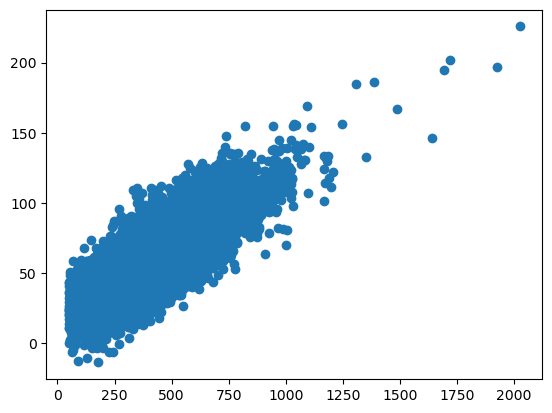

In [42]:
plt.scatter(dados_estoque['qtde_paginas'], dados_estoque['preco'])

plt.show()

*Gráfico de dispersão (formatado)*

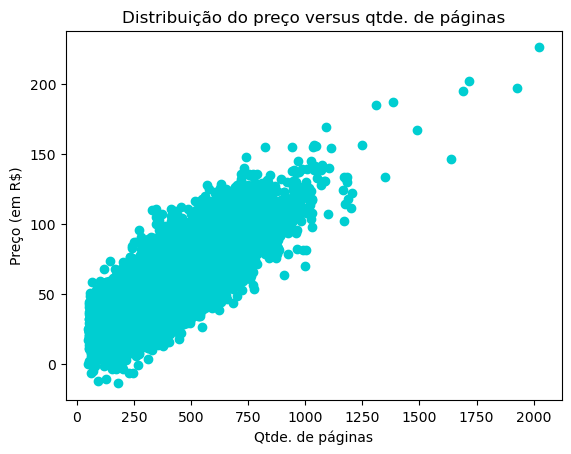

In [43]:
plt.scatter(
    dados_estoque['qtde_paginas'],
    dados_estoque['preco'],
    color  = 'darkturquoise',
    marker = 'o'
)

plt.title('Distribuição do preço versus qtde. de páginas')
plt.xlabel('Qtde. de páginas')
plt.ylabel('Preço (em R$)')

plt.show()

*Gráfico de dispersão (formatado e com transparência nos pontos)*

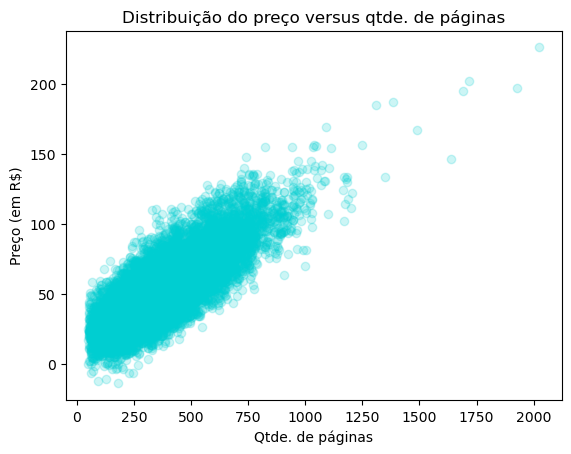

In [44]:
import matplotlib.colors as mcolors

plt.scatter(
    dados_estoque['qtde_paginas'],
    dados_estoque['preco'],
    color  = mcolors.to_rgba('darkturquoise', 0.2),
    marker = 'o'
)

plt.title('Distribuição do preço versus qtde. de páginas')
plt.xlabel('Qtde. de páginas')
plt.ylabel('Preço (em R$)')

plt.show()

### Análise bivariada/trivariada: qualitativas vs. quantitativas *(exemplos)*

*Principais medidas resumo com quebra por variável qualitativa*

In [45]:
print('Capa dura')
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Dura'].describe()

Capa dura


count    4733.000000
mean       66.823761
std        20.997436
min         4.690000
25%        52.630000
50%        64.750000
75%        79.070000
max       184.650000
Name: preco, dtype: float64

In [46]:
print('Capa flexível')
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Flexivel'].describe()

Capa flexível


count    12267.00000
mean        48.92177
std         20.79931
min        -13.80000
25%         34.59000
50%         46.58000
75%         60.70000
max        225.77000
Name: preco, dtype: float64

*Percentis com quebra por variável qualitativa*

In [47]:
print('Capa dura')
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Dura'].quantile([0.01, 0.99])

Capa dura


0.01     24.8092
0.99    125.2284
Name: preco, dtype: float64

In [48]:
print('Capa flexível')
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Flexivel'].quantile([0.01, 0.99])

Capa flexível


0.01      9.8264
0.99    110.1304
Name: preco, dtype: float64

*Histograma com quebra por variável qualitativa (básico)*

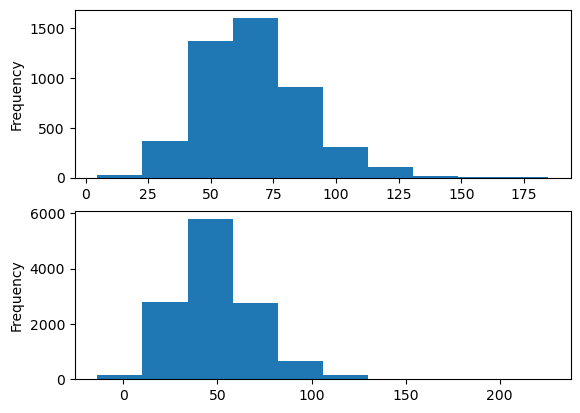

In [49]:
plt.subplot(2, 1, 1)
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Dura'].plot(kind = 'hist')
plt.subplot(2, 1, 2)
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Flexivel'].plot(kind = 'hist')

plt.show()

*Histograma com quebra por variável qualitativa (formatado)*

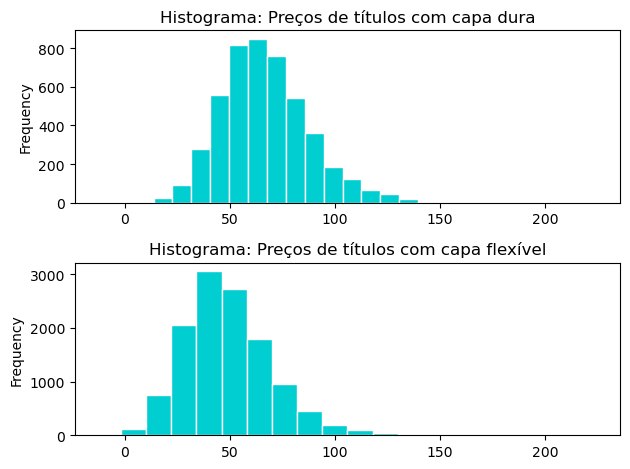

In [50]:
preco_min = dados_estoque['preco'].min() - 10    # Definir valor mínimo para os gráficos
preco_max = dados_estoque['preco'].max() + 10    # Definir valor máximo para os gráficos

plt.subplot(2, 1, 1)
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Dura'].plot(kind = 'hist',
                                                                  title = 'Histograma',
                                                                  xlabel = 'Preço (em R$)',
                                                                  ylabel = 'Frequência',
                                                                  bins = 20,
                                                                  color = 'darkturquoise',
                                                                  edgecolor = 'white')
plt.title('Histograma: Preços de títulos com capa dura')
plt.xlim(preco_min, preco_max)    # Definir limites do eixo horizontal
plt.tight_layout()                # Adiciona espaçamento entre os subplots

plt.subplot(2, 1, 2)
dados_estoque['preco'][dados_estoque['tipo_capa'] == 'Flexivel'].plot(kind = 'hist',
                                                                      title = 'Histograma',
                                                                      xlabel = 'Preço (em R$)',
                                                                      ylabel = 'Frequência',
                                                                      bins = 20,
                                                                      color = 'darkturquoise',
                                                                      edgecolor = 'white')
plt.title('Histograma: Preços de títulos com capa flexível')
plt.xlim(preco_min, preco_max)    # Definir limites do eixo horizontal
plt.tight_layout()                # Adiciona espaçamento entre os subplots

plt.show()

*Boxplot com quebra por variável qualitativa (básico)*

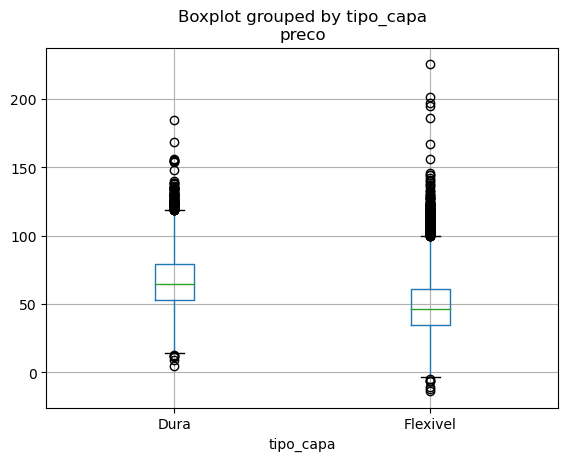

In [51]:
dados_estoque.boxplot(column = 'preco', by = 'tipo_capa')

plt.show()

*Boxplot com quebra por variável qualitativa (formatado)*

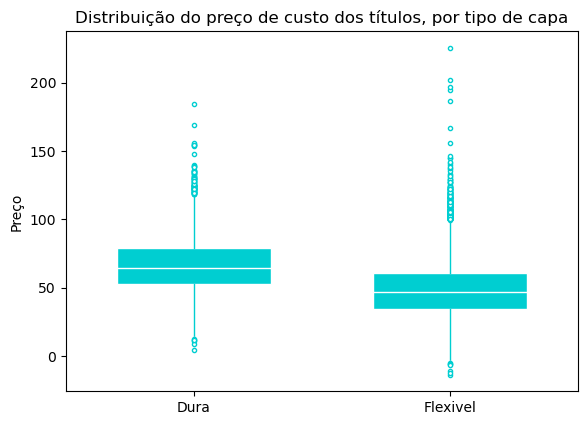

In [52]:
ax = dados_estoque.boxplot(
    column       = 'preco',
    by           = 'tipo_capa',
    grid         = False,
    patch_artist = True,
    widths       = 0.6,                                                         # Largura da caixa
    boxprops     = dict(facecolor = 'darkturquoise', color = 'white'),          # Cor de preenchimento e borda da caixa
    whiskerprops = dict(color = 'darkturquoise'),                               # Cor das hastes/bigodes
    capprops     = dict(color = 'white'),                                       # Cor das barras de limite superior e inferior
    medianprops  = dict(color = 'white'),                                       # Cor da linha da mediana
    flierprops   = dict(markerfacecolor = 'white', markeredgecolor = 'darkturquoise', marker = 'o', markersize = 3, color = 'turquoise', linestyle = 'none')    # Cor dos outliers
)

ax.set_title('Distribuição do preço de custo dos títulos, por tipo de capa')    # Título do gráfico
ax.set_ylabel('Preço')                                                          # Título do eixo vertical
ax.set_xlabel('')                                                               # Título do eixo horizontal
plt.suptitle('')                                                                # Remover o título gerado automaticamente

plt.show()

*Gráfico de dispersão com terceira dimensão qualitativa (básico)*

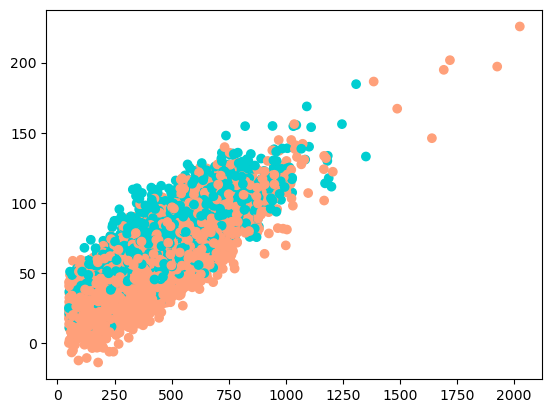

In [53]:
plt.scatter(dados_estoque['qtde_paginas'], dados_estoque['preco'], c = dados_estoque['tipo_capa'].apply(lambda x: 'darkturquoise' if x == 'Dura' else 'lightsalmon'))

plt.show()

*Gráfico de dispersão com terceira dimensão qualitativa (formatado e com transparência nos pontos)*

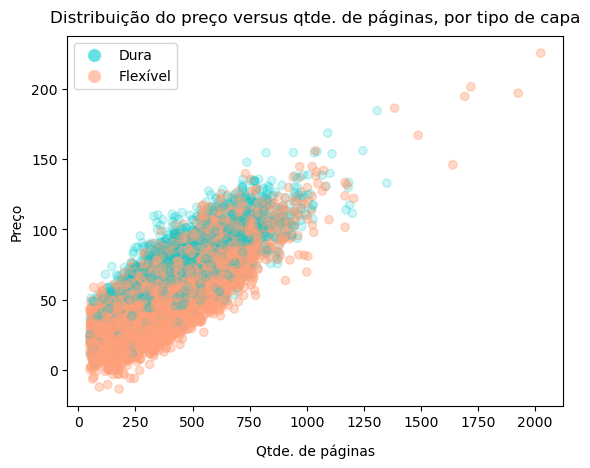

In [54]:
import matplotlib.colors as mcolors

plt.scatter(
    dados_estoque['qtde_paginas'],
    dados_estoque['preco'],
    c = dados_estoque['tipo_capa'].apply(lambda x: mcolors.to_rgba('darkturquoise', 0.2) if x == 'Dura' else mcolors.to_rgba('lightsalmon', 0.4)),
    marker = 'o'
)

handles = [    # Definir legenda
    plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'darkturquoise', alpha = 0.6, markersize = 10, label = 'Dura'),
    plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = 'lightsalmon', alpha = 0.6, markersize = 10, label = 'Flexível')
]

plt.legend(handles = handles)    # Acrescentar legenda
plt.title('Distribuição do preço versus qtde. de páginas, por tipo de capa', pad = 10)    # pad: acrescentar espaço entre gráfico e título
plt.xlabel('Qtde. de páginas', labelpad = 10)                                             # labelpad: acrescentar espaço entre eixo e título do eixo
plt.ylabel('Preço', labelpad = 5)

plt.show()